In [5]:
pip install tensorflow matplotlib numpy

  Using cached tensorflow-2.18.0-cp311-cp311-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp311-cp311-win_amd64.whl.metadata (4.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.68.1-cp311-cp311-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.7.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached h5py-3.12.1-cp311-cp311-win_amd64.whl.metadata (2.5 kB)
  Using cac

In [25]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam


dataset_path = './Intel_Image_Classification'
train_dir = os.path.join(dataset_path, 'seg_train')
test_dir = os.path.join(dataset_path, 'seg_test')

# # Data Augmentation and Normalization
# datagen = ImageDataGenerator(
#     rescale=1./255,  # Normalize pixel values to [0, 1]
#     validation_split=0.2,  # Use 20% of training data for validation
#     horizontal_flip=True,
#     rotation_range=20,
#     zoom_range=0.2
# )

# # Load training and validation data
# train_data = datagen.flow_from_directory(
#     train_dir, target_size=(150, 150), batch_size=32, subset='training', class_mode='categorical')
# val_data = datagen.flow_from_directory(
#     train_dir, target_size=(150, 150), batch_size=32, subset='validation', class_mode='categorical')

# # Load test data (without augmentation)
# test_data = ImageDataGenerator(rescale=1./255).flow_from_directory(
#     test_dir, target_size=(150, 150), batch_size=32, class_mode='categorical')

# Data Generators with correct class_mode
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    subset='training',
    class_mode='categorical'  # Ensures one-hot encoding
)

val_data = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    subset='validation',
    class_mode='categorical'  # Ensures one-hot encoding
)


Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.


In [8]:
#Build CNN Model

In [ ]:
Shallow CNN Model

In [19]:
# def build_shallow_cnn():
#     model = Sequential([
#         Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
#         MaxPooling2D(2, 2),
#         Conv2D(64, (3, 3), activation='relu'),
#         MaxPooling2D(2, 2),
#         Flatten(),
#         Dense(128, activation='relu'),
#         Dense(6, activation='softmax')  # 6 output classes
#     ])
#     model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
#     return model

def build_shallow_cnn():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(6, activation='softmax')  # Match the number of classes
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
Deep CNN Model

In [20]:
# def build_deep_cnn():
#     model = Sequential([
#         Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
#         MaxPooling2D(2, 2),
#         Conv2D(64, (3, 3), activation='relu'),
#         MaxPooling2D(2, 2),
#         Conv2D(128, (3, 3), activation='relu'),
#         MaxPooling2D(2, 2),
#         Conv2D(256, (3, 3), activation='relu'),
#         MaxPooling2D(2, 2),
#         Flatten(),
#         Dense(256, activation='relu'),
#         Dense(6, activation='softmax')
#     ])
#     model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
#     return model

def build_deep_cnn():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(256, activation='relu'),
        Dense(6, activation='softmax')  # Match the number of classes
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model



x_batch, y_batch = next(train_data)
print("Input batch shape:", x_batch.shape)  # Should be (batch_size, 150, 150, 3)
print("Target batch shape:", y_batch.shape)  # Should be (batch_size, 6)


Input batch shape: (32, 150, 150, 3)
Target batch shape: (32, 6)


In [ ]:
Train the models

In [21]:
# # Build and train Shallow CNN
# shallow_model = build_shallow_cnn()
# history_shallow = shallow_model.fit(train_data, validation_data=val_data, epochs=20)

# # Build and train Deep CNN
# deep_model = build_deep_cnn()
# history_deep = deep_model.fit(train_data, validation_data=val_data, epochs=20)


# Train Shallow CNN
shallow_model = build_shallow_cnn()
history_shallow = shallow_model.fit(train_data, validation_data=val_data, epochs=20)

# Train Deep CNN
deep_model = build_deep_cnn()
history_deep = deep_model.fit(train_data, validation_data=val_data, epochs=20)


Epoch 1/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 308s 866ms/step - accuracy: 0.5156 - loss: 3.8335 - val_accuracy: 0.7350 - val_loss: 0.7548
Epoch 2/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 109s 309ms/step - accuracy: 0.8033 - loss: 0.5693 - val_accuracy: 0.7550 - val_loss: 0.7148
Epoch 3/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 329s 939ms/step - accuracy: 0.9026 - loss: 0.3100 - val_accuracy: 0.7422 - val_loss: 0.7731
Epoch 4/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 112s 319ms/step - accuracy: 0.9551 - loss: 0.1671 - val_accuracy: 0.7561 - val_loss: 0.8229
Epoch 5/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 112s 319ms/step - accuracy: 0.9793 - loss: 0.0886 - val_accuracy: 0.7461 - val_loss: 0.8997
Epoch 6/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 112s 320ms/step - accuracy: 0.9897 - loss: 0.0579 - val_accuracy: 0.7325 - val_loss: 1.1328
Epoch 7/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 112s 319ms/step - accuracy: 0.9901 - loss: 0.0485 - val_accuracy: 0.7439 - val_loss: 1.0776
Epoch 8/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 112s 320ms/step - accuracy: 0.9869 -

In [ ]:
Evaluate Models and Visualize Results
Plot Learning Curves (Accuracy and Loss)

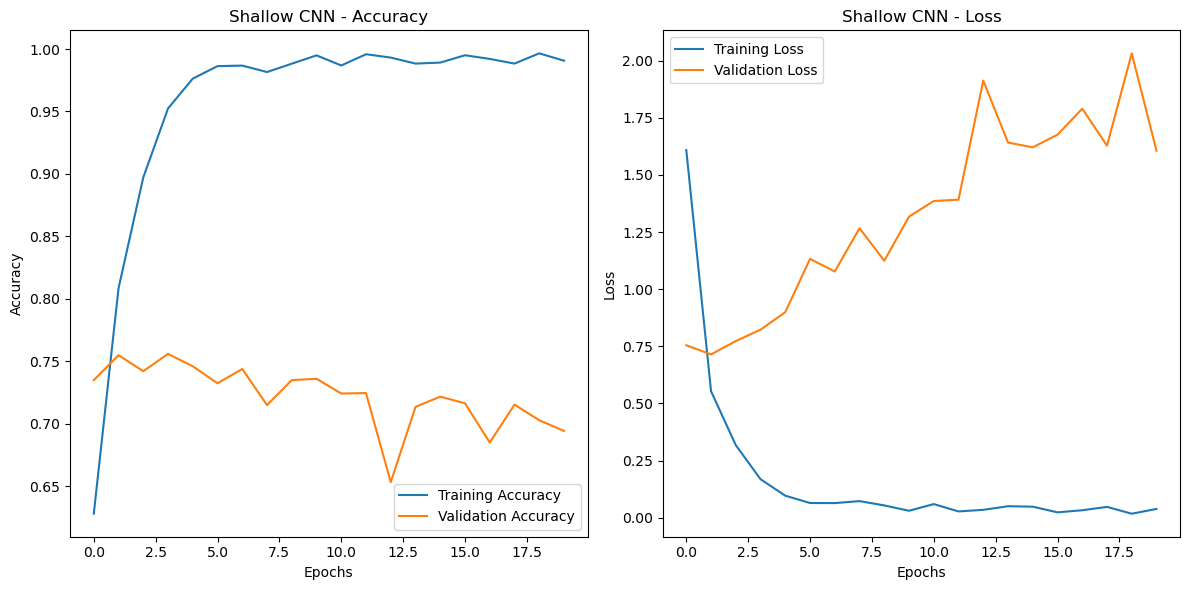

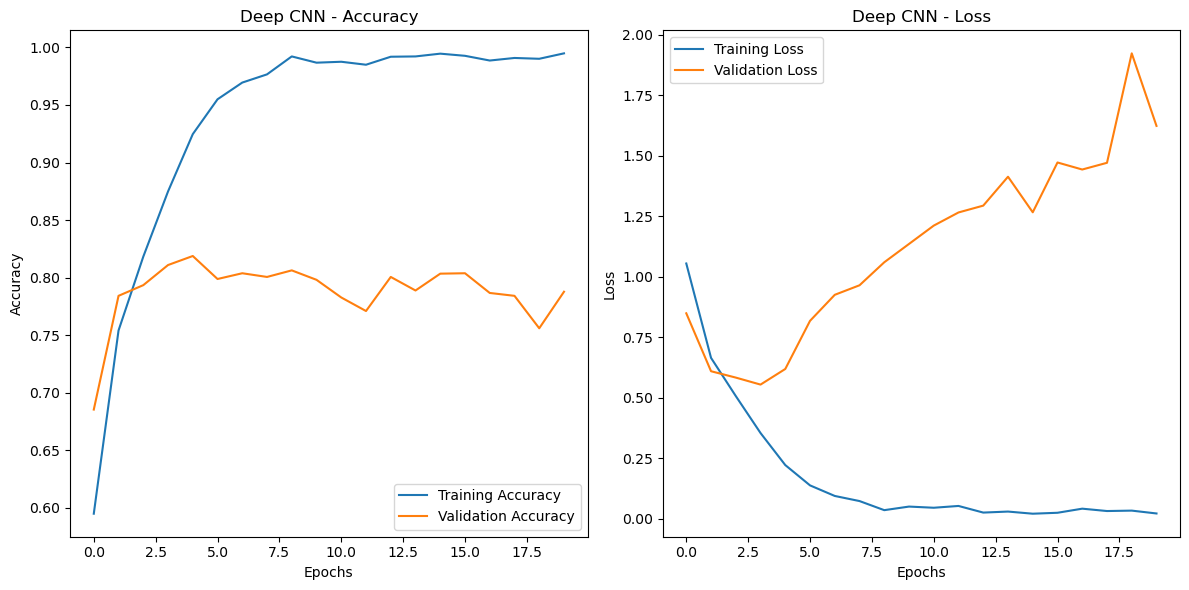

In [22]:
def plot_learning_curve(history, title):
    plt.figure(figsize=(12, 6))
    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_learning_curve(history_shallow, 'Shallow CNN')
plot_learning_curve(history_deep, 'Deep CNN')


In [ ]:
Confusion Matrix and Classification Report

In [33]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

def evaluate_model(model, test_data):
    predictions = np.argmax(model.predict(test_data), axis=1)
    true_labels = test_data.classes

    # Debugging: Check alignment
    print("Predictions (first 10):", predictions[:10])
    print("True Labels (first 10):", true_labels[:10])
    print("Class Indices:", test_data.class_indices)
    print("Number of Classes:", len(test_data.class_indices))

    # Extract class names
    class_names = list(test_data.class_indices.keys())
    print("Class Names:", class_names)

    # Ensure alignment of labels
    labels = list(test_data.class_indices.values())

    # Confusion Matrix
    cm = confusion_matrix(true_labels, predictions, labels=labels)
    print("Confusion Matrix:\n", cm)

    # Classification Report
    report = classification_report(
        true_labels, predictions,
        target_names=class_names, labels=labels
    )
    print("Classification Report:\n", report)

# Evaluate models
evaluate_model(deep_model, test_data)
evaluate_model(shallow_model, test_data)


94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step
Predictions (first 10): [4 2 3 2 3 3 4 5 4 5]
True Labels (first 10): [0 0 0 0 0 0 0 0 0 0]
Class Indices: {'seg_test': 0}
Number of Classes: 1
Class Names: ['seg_test']
Confusion Matrix:
 [[384]]
Classification Report:
               precision    recall  f1-score   support

    seg_test       1.00      0.13      0.23      3000

   micro avg       1.00      0.13      0.23      3000
   macro avg       1.00      0.13      0.23      3000
weighted avg       1.00      0.13      0.23      3000

94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step
Predictions (first 10): [2 4 3 5 5 4 0 1 0 0]
True Labels (first 10): [0 0 0 0 0 0 0 0 0 0]
Class Indices: {'seg_test': 0}
Number of Classes: 1
Class Names: ['seg_test']
Confusion Matrix:
 [[482]]
Classification Report:
               precision    recall  f1-score   support

    seg_test       1.00      0.16      0.28      3000

   micro avg       1.00      0.16      0.28      3000
   macro avg       1.00      0.16      0.

In [ ]:
Save the Models 

In [24]:
# Save trained models
shallow_model.save('shallow_cnn_model.h5')
deep_model.save('deep_cnn_model.h5')
